# importing libraries

In [1]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading data

In [2]:
cars = pd.read_csv('../../../Data/data_model.csv')

In [3]:
df_cars = cars.copy()  #makinga copy of original data set

print('Original Data Shape:',df_cars.shape)


Original Data Shape: (3813, 41)


Metric	    Target Range

MAE	          2,000–8,000

RMSE	      3,000–12,000

MAPE	      ≤15% (across all prices)

R² Score	  >0.80, ideally >0.85

# Dropping unwanted and unimportant columns

In [4]:
df_cars.columns

Index(['brand', 'model', 'model_year', 'fuel_type', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title', 'price', 'years_used', 'capacity',
       'horsepower', 'cylinder_count', 'mileage_per_year', 'mileage_sqrt',
       'mileage_with_age', 'mileage_per_year_with_age', 'mileage_brand',
       'mileage', 'brand_category', 'log_price', 'power_to_weight_ratio',
       'brand_frequency', 'model_frequency', 'brand_target_enc',
       'model_target_enc', 'mileage_per_year_sqrt', 'mileage_times_age',
       'mileage_sqrt_times_age', 'horsepower_times_cylinder_count',
       'capacity_mileage_interaction', 'age_squared', 'mileage_binned',
       'log_mileage', 'log_capacity', 'capacity_binned', 'horsepower_binned',
       'age_binned', 'trans_num', 'brand_enc'],
      dtype='object')

In [5]:
col1 =['fuel_type', 'transmission','capacity_binned','mileage_sqrt','years_used', 'log_price','brand','horsepower','brand_frequency']
col=col1

# Linear Regression


In [6]:
def perform_linear_regression(df, random_state, target_column='log_price'):
    """
    Perform Linear Regression on the given DataFrame and evaluate the results.
    
    Parameters:
    df (pd.DataFrame): The input dataset containing features and target column.
    target_column (str): The name of the target column. Default is 'log_price'.
    test_size (float): The proportion of the dataset to include in the test split.
    random_state (int): Random state for reproducibility.
    
    Returns:
    dict: A dictionary containing evaluation metrics.
    """
    # Splitting the data into features (X) and target (y)
    X = df.drop(target_column, axis=1)  # Excluding the target column
    y = df[target_column]  # Target column

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=random_state)

    # Initialize and fit the scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and fit the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = lr_model.predict(X_test_scaled)

    # Calculate metrics on the log scale
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    smape = np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))) * 100

    # Transform predictions back to the original scale
    y_pred_original = np.exp(y_pred)
    y_test_original = np.exp(y_test)

    # Calculate metrics on the actual price scale
    mae_actual = mean_absolute_error(y_test_original, y_pred_original)
    mse_actual = mean_squared_error(y_test_original, y_pred_original)
    rmse_actual = np.sqrt(mse_actual)
    r2_actual = r2_score(y_test_original, y_pred_original)
    mape_actual = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100
    smape_actual = np.mean(2 * np.abs(y_test_original - y_pred_original) / 
                           (np.abs(y_test_original) + np.abs(y_pred_original))) * 100

    # Create a results dictionary
    results = {
        #"MAE (log scale)": mae,
        #"MSE (log scale)": mse,
        #"RMSE (log scale)": rmse,
        #"R² (log scale)": r2,
        #"MAPE (log scale)": mape,
        #"sMAPE (log scale)": smape,
        "MAE (Actual Price)": mae_actual,
        "MSE (Actual Price)": mse_actual,
        "RMSE (Actual Price)": rmse_actual,
        "R² (Actual Price)": r2_actual,
        "MAPE (Actual Price)": mape_actual,
        "sMAPE (Actual Price)": smape_actual
    }
    return results, y_test, y_pred


In [7]:

df = df_cars[col]


# Now apply one-hot encoding to these columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.to_list()
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)*1.0

rndm_state=100

# Assuming `df` is your DataFrame with the target column 'log_price'
results, y_test, y_pred= perform_linear_regression(df_encoded, random_state=rndm_state, target_column='log_price')
# Display the results
for metric, value in results.items():
    print(f"{metric}: {value}")

MAE (Actual Price): 10389.263509259197
MSE (Actual Price): 375070404.3489595
RMSE (Actual Price): 19366.73447819636
R² (Actual Price): 0.7683477920555163
MAPE (Actual Price): 26.965743491747624
sMAPE (Actual Price): 25.89702482014645


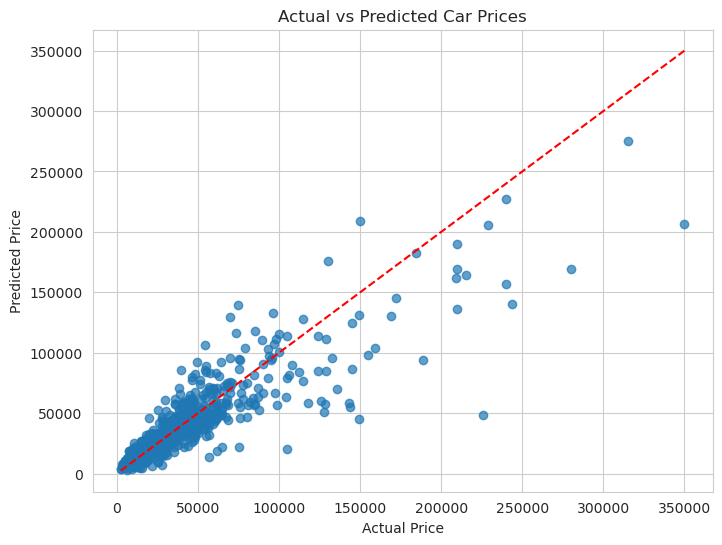

In [ ]:
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original,alpha=0.7)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.savefig('LR_price_comparison.png')
plt.show()

In [9]:
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
outlier_mask = (residuals > mean_residual + 3 * std_residual) | (residuals < mean_residual - 3 * std_residual)


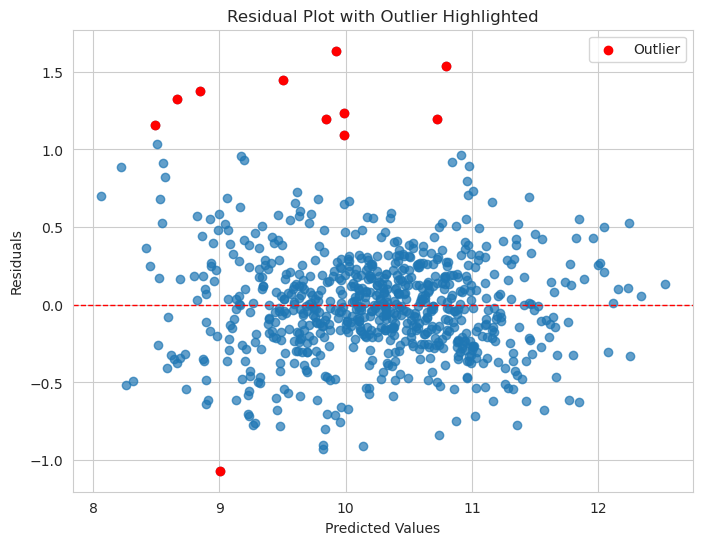

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.scatter(y_pred[outlier_mask], residuals[outlier_mask], color='red', label='Outlier')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.title("Residual Plot with Outlier Highlighted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.savefig('LR_residuals.png')
plt.show()


In [11]:
# Remove the outlier
y_test_filtered = y_test[~outlier_mask]
y_pred_filtered = y_pred[~outlier_mask]


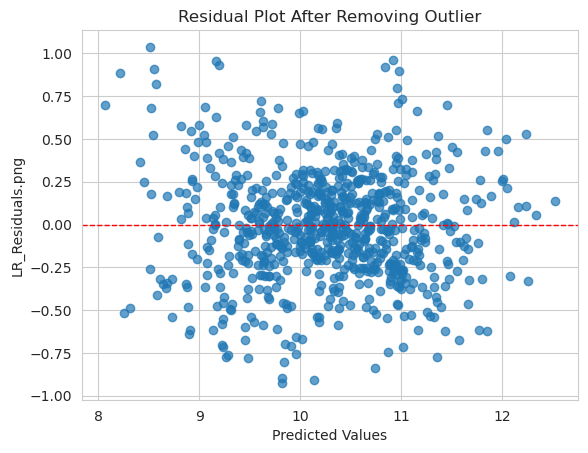

In [ ]:
residuals_filtered = y_test_filtered - y_pred_filtered
plt.scatter(y_pred_filtered, residuals_filtered, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot After Removing Outlier")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [13]:
outlier_indices = np.where(outlier_mask)[0]
print("Outlier Indices:", outlier_indices)

Outlier Indices: [  1 181 288 309 336 454 493 560 689 725 749]


In [14]:
# Assuming your dataset is in a DataFrame called df
outlier_data = df.iloc[outlier_indices]
print("Outlier Data Points:")
print(outlier_data)


Outlier Data Points:
    fuel_type transmission  capacity_binned  mileage_sqrt  years_used  \
1    Gasoline    Automatic              4.0    186.392060         3.0   
181  Gasoline    Automatic              6.0    329.393382         8.0   
288  Gasoline    Automatic              4.0    170.079393         2.0   
309  Gasoline    Automatic              4.0    200.000000         4.0   
336  Gasoline    Automatic              2.0    261.086193         5.0   
454  Gasoline    Automatic              2.0    220.227155         5.0   
493  Gasoline    Automatic              4.0    179.212165         2.0   
560  Gasoline       Manual              2.0    212.132034        10.0   
689  Gasoline    Automatic              6.0    191.117765         5.0   
725  Gasoline       Manual              2.0     32.787193         1.0   
749  Gasoline    Tiptronic              2.0    146.287388         5.0   

     log_price          brand  horsepower  brand_frequency  
1    10.545499        Hyundai  331.515805

In [15]:
from scipy import stats

# Calculate z-scores
z_scores = stats.zscore(residuals)

# Identify points with z-scores greater than 3 (or less than -3, depending on threshold)
outliers = np.where(np.abs(z_scores) > 3)
print("Outlier indices:", outliers)


Outlier indices: (array([  1, 181, 288, 309, 336, 454, 493, 560, 689, 725, 749]),)


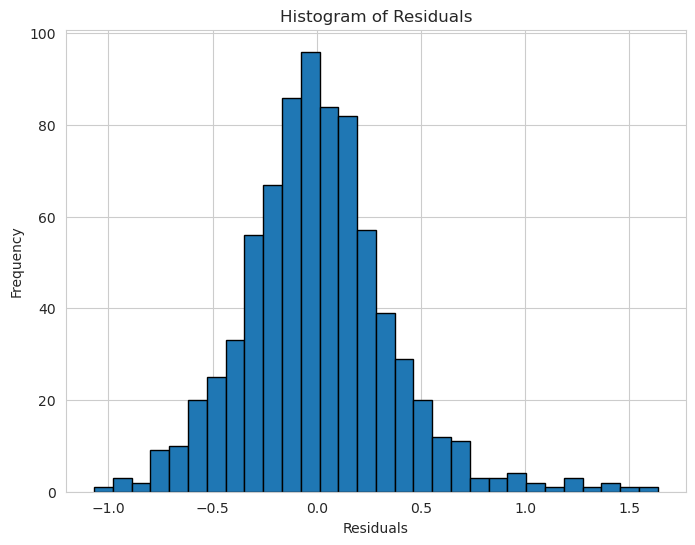

In [22]:
# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.savefig('LR_residual_hist.png')
plt.show()